In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import *
from keras import optimizers
from keras.optimizers import Adam


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

In [3]:
autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

Epoch 1/10
59/59 [==============================] - 7s 114ms/step - loss: 0.0773 - val_loss: 0.0505
Epoch 2/10
59/59 [==============================] - 6s 98ms/step - loss: 0.0432 - val_loss: 0.0368
Epoch 3/10
59/59 [==============================] - 6s 99ms/step - loss: 0.0335 - val_loss: 0.0295
Epoch 4/10
59/59 [==============================] - 6s 101ms/step - loss: 0.0280 - val_loss: 0.0259: 0.02
Epoch 5/10
59/59 [==============================] - 5s 89ms/step - loss: 0.0253 - val_loss: 0.0239
Epoch 6/10
59/59 [==============================] - 5s 92ms/step - loss: 0.0237 - val_loss: 0.0225
Epoch 7/10
59/59 [==============================] - 6s 98ms/step - loss: 0.0224 - val_loss: 0.0215
Epoch 8/10
59/59 [==============================] - 6s 97ms/step - loss: 0.0214 - val_loss: 0.0206
Epoch 9/10
59/59 [==============================] - 6s 95ms/step - loss: 0.0206 - val_loss: 0.0200
Epoch 10/10
59/59 [==============================] - 5s 91ms/step - loss: 0.0199 - val_loss: 0.0193


In [4]:
# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

In [5]:
%matplotlib inline
from keras.preprocessing import image
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
img = image.load_img ("img.jpeg", target_size=(28, 28),color_mode = "grayscale")
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

[1967.9967]


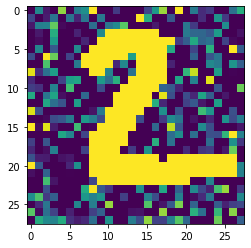

In [6]:
# The code below is from the Keras Blogs
# https://blog.keras.io/building-autoencoders-in-keras.html
import matplotlib.pyplot as plt
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [7]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

In [8]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=4,
                batch_size=300,
                validation_data=(x_test_noisy, x_test))

Epoch 1/4
200/200 [==============================] - 116s 581ms/step - loss: -501.8015 - val_loss: -510.9551
Epoch 2/4
200/200 [==============================] - 123s 613ms/step - loss: -503.7586 - val_loss: -511.0121
Epoch 3/4
200/200 [==============================] - 119s 593ms/step - loss: -503.7986 - val_loss: -511.0468
Epoch 4/4
132/200 [==================>...........] - ETA: 38s - loss: -503.4280

In [ ]:
plt.imshow(x_train_noisy[1])

In [ ]:
result=autoencoder.predict(x_train_noisy[1].reshape(1,28,28,1))

In [ ]:
plt.imshow(result.reshape(28,28))